# Zomato Data Analysis

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("Zomato data .csv")

In [60]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [27]:
df.shape

(148, 7)

In [32]:
df.ndim

2

In [35]:
df.size

1036

In [39]:
def handle_rate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handle_rate)
df['rate']

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

## 1.What type of restaurant do the majority of customers order from? 

Text(0.5, 0, 'type of resturant')

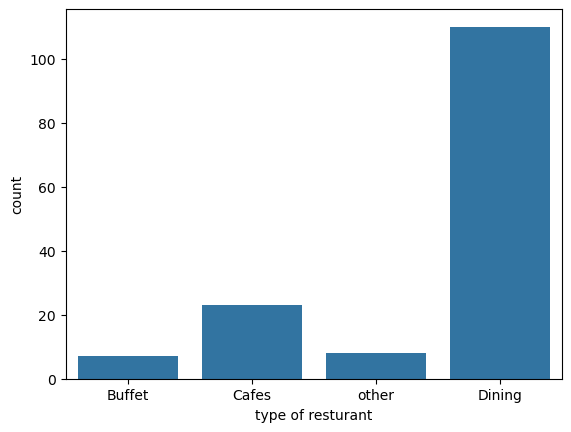

In [45]:
sns.countplot(x= df['listed_in(type)'])
plt.xlabel("type of resturant")

The dinning

## 2. How many votes has each type of restaurant recieved from customer?

Text(0, 0.5, 'Votes')

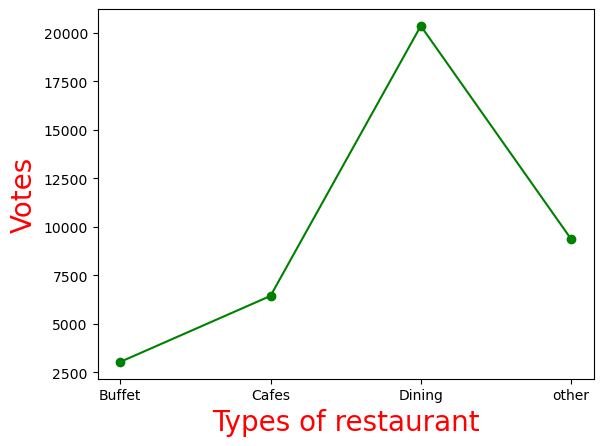

In [58]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = 'green' , marker = 'o')
plt.xlabel("Types of restaurant", c = 'red' , size =20)
plt.ylabel("Votes", c ='red' , size =20)

### `Conclusion:` Dinning resturants has recieved maximum votes

## 3. What are the ratings that the majority of restaurants have recieved?

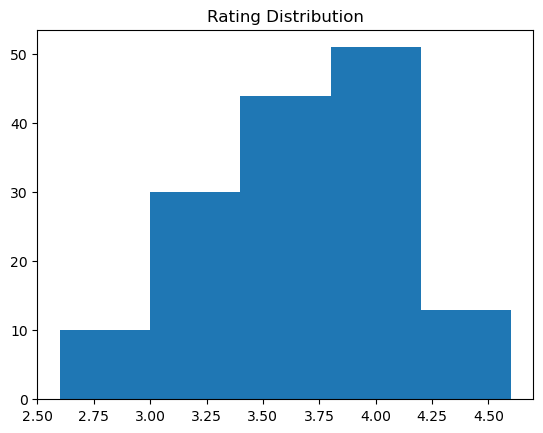

In [70]:
plt.hist(df['rate'],bins =5)
plt.title('Rating Distribution')
plt.show()

### `Conclusion`: The majority resturant recieved rating from 3.5 to 4

## 4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [75]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

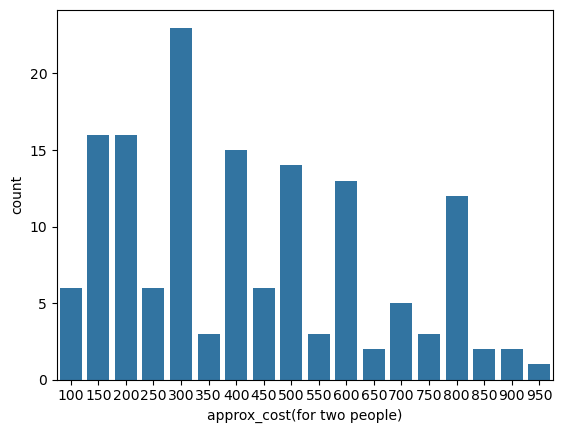

In [79]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)

### `Conclusion`: The majority of couples preferr resturants with an approximate cost of 300 rs

## 5. Which mode (online and offline) has recieved the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

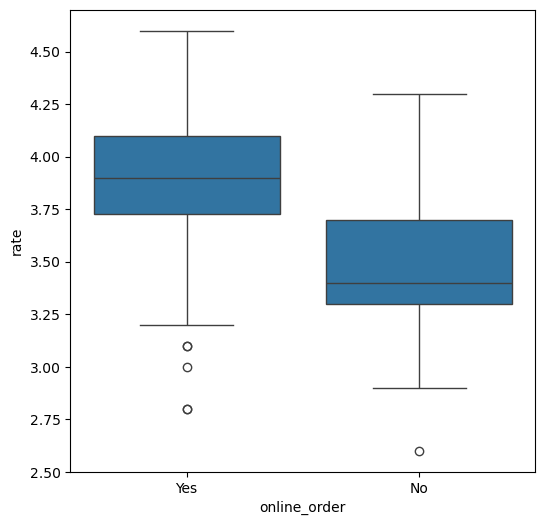

In [93]:
plt.figure(figsize =(6,6))
sns.boxplot(x = 'online_order', y ='rate', data = df)

### `conclusion`: Offline order recieves lower rating in comparision to online order

## 6. Which type of restaurant recieved more offline orders, so that zomato can prove customers with some good offers?

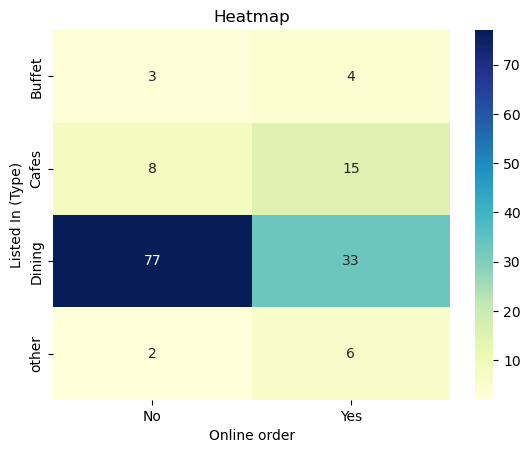

In [101]:
pivot_table = df.pivot_table(index='listed_in(type)', columns = 'online_order' , aggfunc = 'size' , fill_value =0)
sns.heatmap(pivot_table, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.title('Heatmap')
plt.xlabel("Online order")
plt.ylabel("Listed In (Type)")
plt.show()

### `Conclusion:` Dining restaurant primarily accepts offline orders, whereas cafes primarly recieve online orders. This suggests that clients prefer order in person at restaurants, but prefer online ordering at cafes.